# Installing Libraries

In [3]:
!pip install pycaret
import pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.6 MB/s eta 0:00:00
   ━━

In [4]:
from pycaret.utils import version
version()

'3.3.2'

In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Loading Dataset

In [8]:
data = pd.read_csv('/content/Dataset on Sales Transaction weekly.csv')

## Preprocessing the Dataset

In [9]:
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [10]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,1.0,11.0,12.0,10.0,8.0,13.0,12.0,14.0,21.0,6.0,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,2.0,7.0,6.0,3.0,2.0,7.0,1.0,6.0,3.0,3.0,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,3.0,7.0,11.0,8.0,9.0,10.0,8.0,7.0,13.0,12.0,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,4.0,12.0,8.0,13.0,5.0,9.0,6.0,9.0,13.0,13.0,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,5.0,8.0,5.0,13.0,11.0,6.0,7.0,9.0,14.0,9.0,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


# Using Clustering

In [11]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(data)

,Description,Value
0,Session id,5104
1,Original data shape,"(811, 107)"
2,Transformed data shape,"(811, 107)"
3,Numeric features,107
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


# K means Clustering

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5117,1850.6091,0.6739,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,1895.5561,0.6926,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4756,2027.7086,0.7177,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

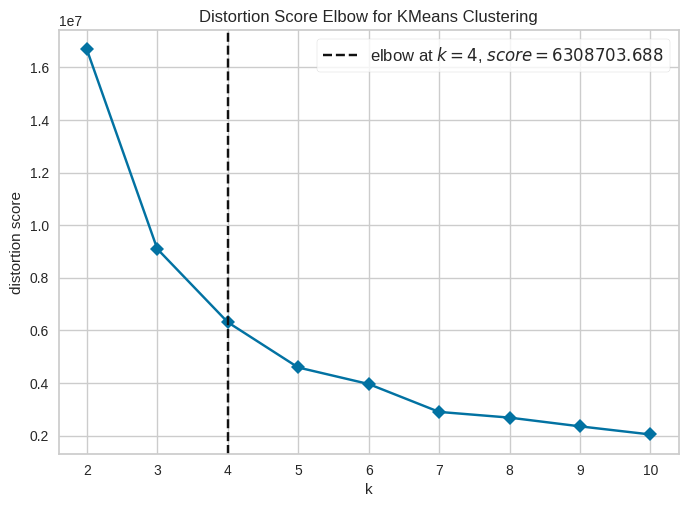

In [12]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2647,518.0097,1.3571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1835,391.4357,1.9079,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1533,307.4605,2.1899,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

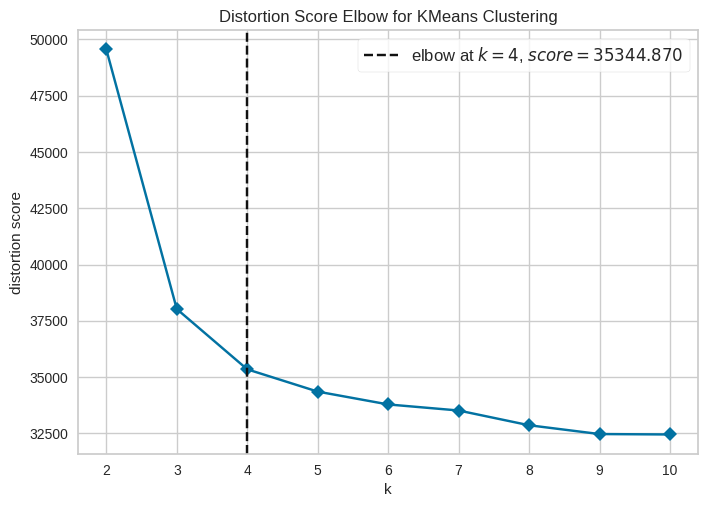

In [13]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5487,2558.7563,0.5795,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4934,2774.9228,0.6461,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4824,2944.0574,0.6437,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

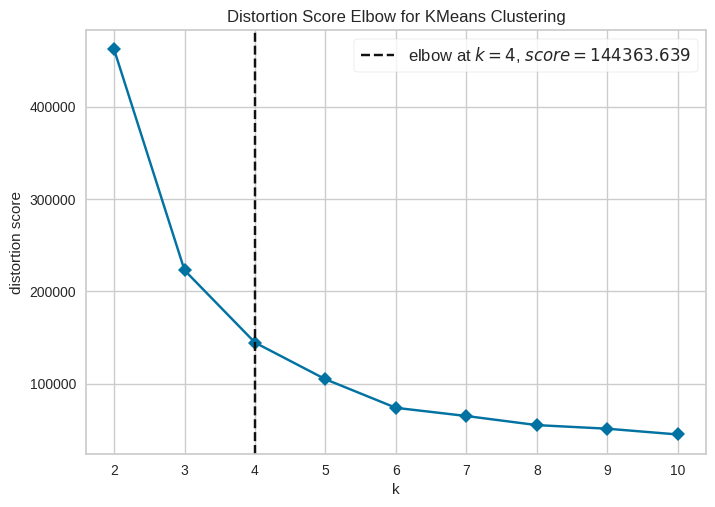

In [14]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r7 = []
r8 = []
r9 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r7.append(silhouette_score(data,labels))
r7.append(calinski_harabasz_score(data,labels))
r7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r8.append(silhouette_score(data,labels))
r8.append(calinski_harabasz_score(data,labels))
r8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r9.append(silhouette_score(data,labels))
r9.append(calinski_harabasz_score(data,labels))
r9.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')


PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5128,1850.5025,0.6725,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4641,1871.2261,0.7182,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4756,2027.7083,0.7177,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

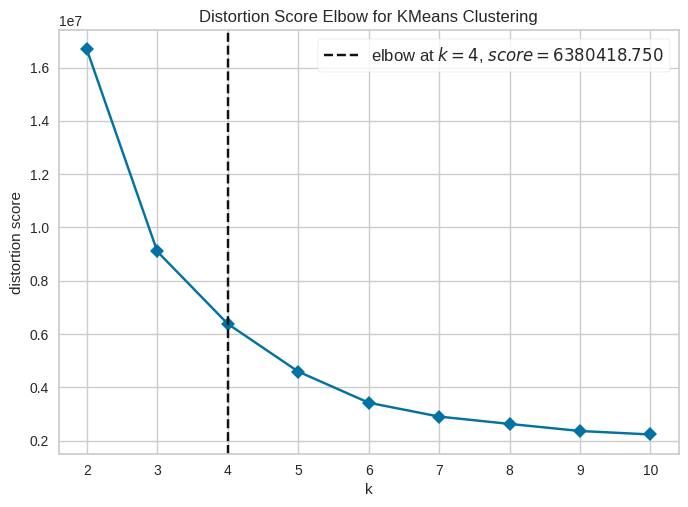

In [15]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2687,588.5178,1.4001,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2093,446.9885,1.6892,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1695,342.2660,2.4238,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

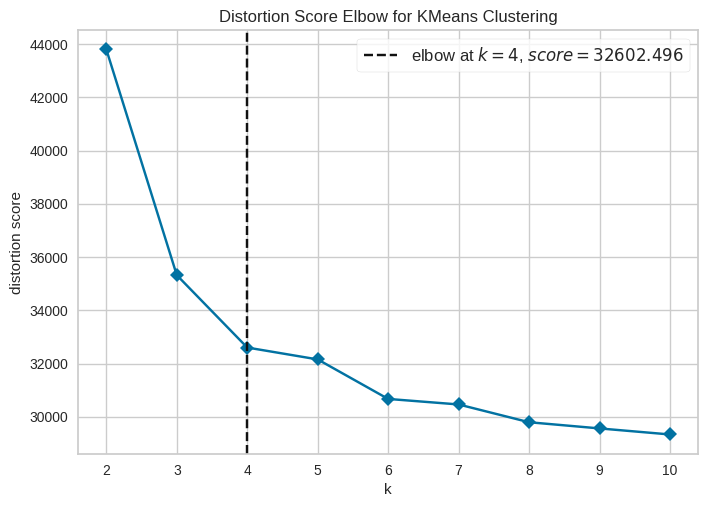

In [16]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r13 = []
r14 = []
r15 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r13.append(silhouette_score(data,labels))
r13.append(calinski_harabasz_score(data,labels))
r13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r14.append(silhouette_score(data,labels))
r14.append(calinski_harabasz_score(data,labels))
r14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r15.append(silhouette_score(data,labels))
r15.append(calinski_harabasz_score(data,labels))
r15.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2687,588.5175,1.4001,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2017,420.4047,2.2006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1550,359.6911,2.2155,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

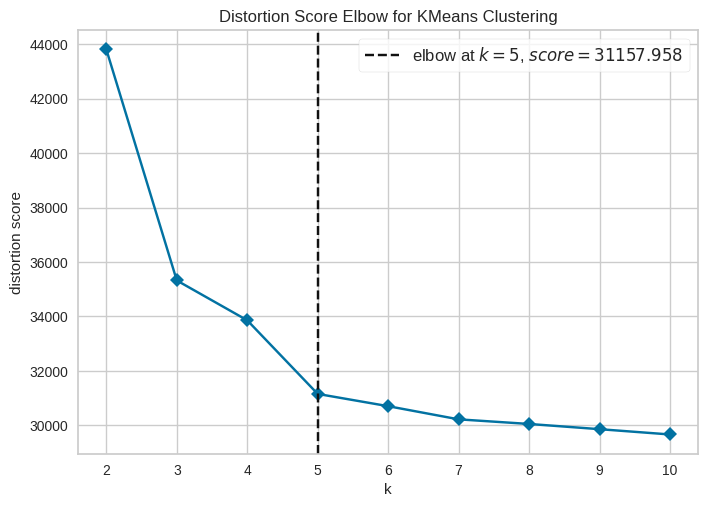

In [17]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      pca = True, pca_method = 'linear', verbose=False)

r16 = []
r17 = []
r18 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r16.append(silhouette_score(data,labels))
r16.append(calinski_harabasz_score(data,labels))
r16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r17.append(silhouette_score(data,labels))
r17.append(calinski_harabasz_score(data,labels))
r17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r18.append(silhouette_score(data,labels))
r18.append(calinski_harabasz_score(data,labels))
r18.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [30]:
result1 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r1,'No Data Processing(c=4)': r2,'No Data Processing(c=5)': r3,
           'Using Normalization(c=3)' : r4,'Using Normalization(c=4)' : r5,'Using Normalization(c=5)' : r6,
           'Using Transform(c=3)' : r7,'Using Transform(c=4)' : r8,'Using Transform(c=5)' : r9,
           'Using PCA(c=3)' : r10,'Using PCA(c=4)' : r11,'Using PCA(c=5)' : r12,
           'Using T + N(c=3)': r13,'Using T + N(c=4)': r14,'Using T + N(c=5)': r15,
           'T + N + PCA(c=3)': r16,'T + N + PCA(c=4)': r17,'T + N + PCA(c=5)': r18}

In [31]:
result1df = pd.DataFrame(result1)

# Hierarichal Clustering

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4761,1627.2474,0.7245,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4805,1713.8042,0.6989,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4500,1791.3560,0.7422,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

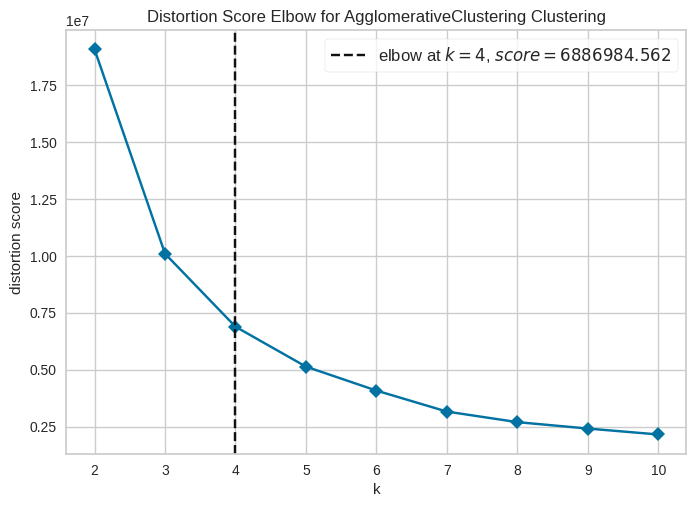

In [18]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2598,503.5507,1.3580,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1721,379.3424,1.9854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1449,300.4316,2.3016,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

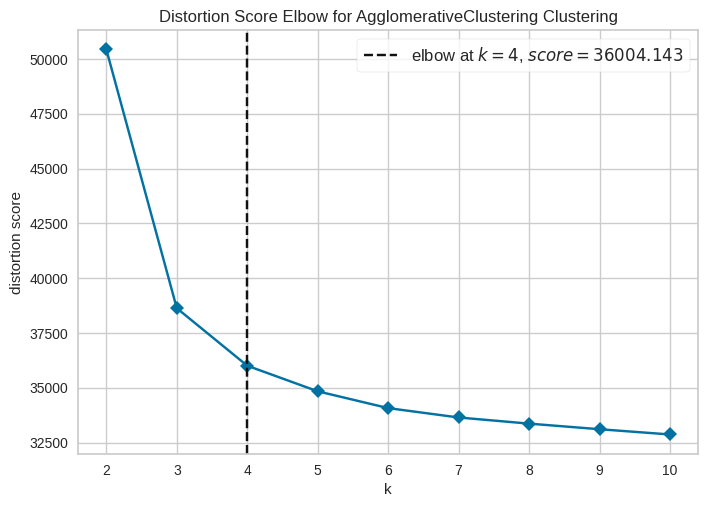

In [19]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5495,2554.8483,0.5791,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5022,2461.1352,0.6045,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4777,2587.6236,0.6813,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

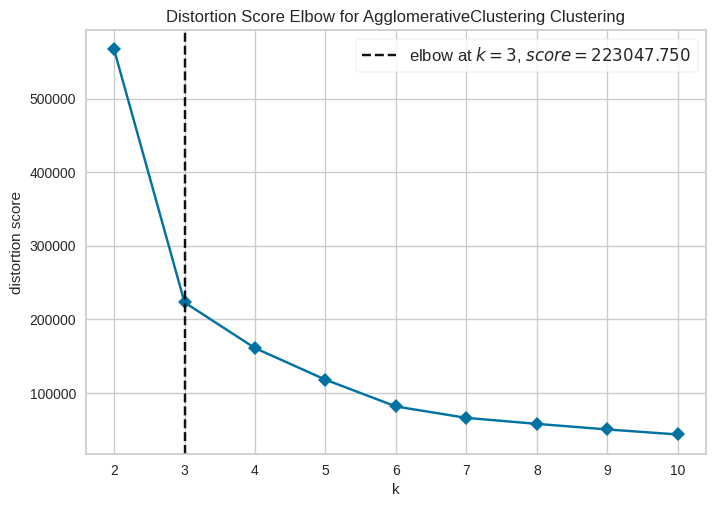

In [20]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r7 = []
r8 = []
r9 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r7.append(silhouette_score(data,labels))
r7.append(calinski_harabasz_score(data,labels))
r7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r8.append(silhouette_score(data,labels))
r8.append(calinski_harabasz_score(data,labels))
r8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r9.append(silhouette_score(data,labels))
r9.append(calinski_harabasz_score(data,labels))
r9.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4761,1627.2474,0.7245,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4805,1713.8040,0.6989,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4500,1791.3558,0.7422,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

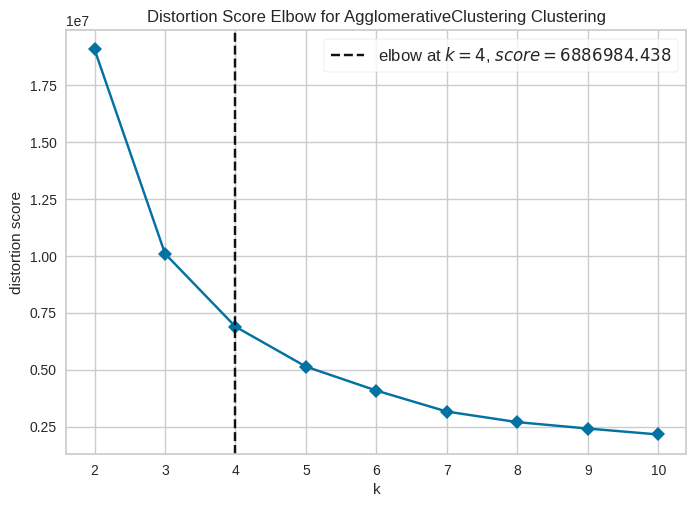

In [21]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2663,581.0961,1.4095,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2062,440.9599,1.6842,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1424,348.5415,2.2946,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

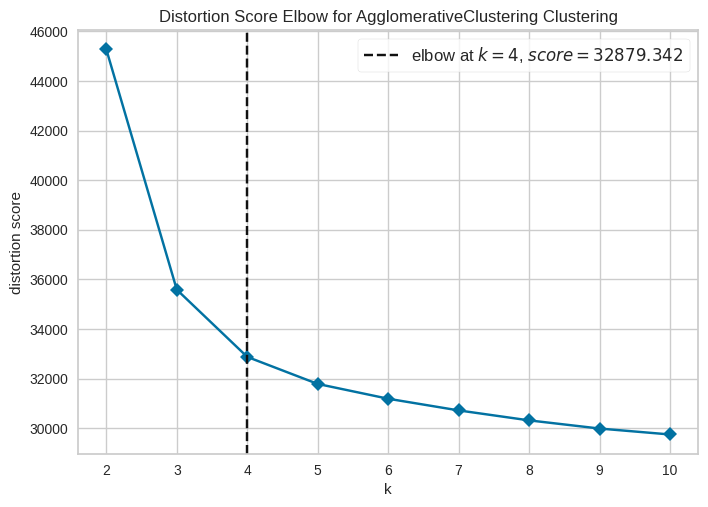

In [22]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r13 = []
r14 = []
r15 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r13.append(silhouette_score(data,labels))
r13.append(calinski_harabasz_score(data,labels))
r13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r14.append(silhouette_score(data,labels))
r14.append(calinski_harabasz_score(data,labels))
r14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r15.append(silhouette_score(data,labels))
r15.append(calinski_harabasz_score(data,labels))
r15.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2663,581.0959,1.4095,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2062,440.9600,1.6842,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1424,348.5414,2.2946,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

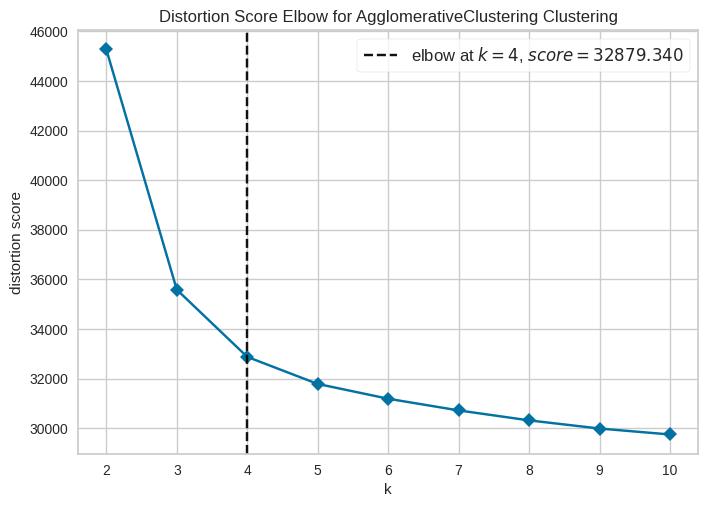

In [23]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      pca = True, pca_method = 'linear', verbose=False)

r16 = []
r17 = []
r18 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r16.append(silhouette_score(data,labels))
r16.append(calinski_harabasz_score(data,labels))
r16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r17.append(silhouette_score(data,labels))
r17.append(calinski_harabasz_score(data,labels))
r17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r18.append(silhouette_score(data,labels))
r18.append(calinski_harabasz_score(data,labels))
r18.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [34]:
result2 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r1,'No Data Processing(c=4)': r2,'No Data Processing(c=5)': r3,
           'Using Normalization(c=3)' : r4,'Using Normalization(c=4)' : r5,'Using Normalization(c=5)' : r6,
           'Using Transform(c=3)' : r7,'Using Transform(c=4)' : r8,'Using Transform(c=5)' : r9,
           'Using PCA(c=3)' : r10,'Using PCA(c=4)' : r11,'Using PCA(c=5)' : r12,
           'Using T + N(c=3)': r13,'Using T + N(c=4)': r14,'Using T + N(c=5)': r15,
           'T + N + PCA(c=3)': r16,'T + N + PCA(c=4)': r17,'T + N + PCA(c=5)': r18}

In [35]:
result2df = pd.DataFrame(result2)

# Birch Clustering

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4761,1627.2474,0.7245,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4805,1713.8042,0.6989,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4500,1791.3560,0.7422,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

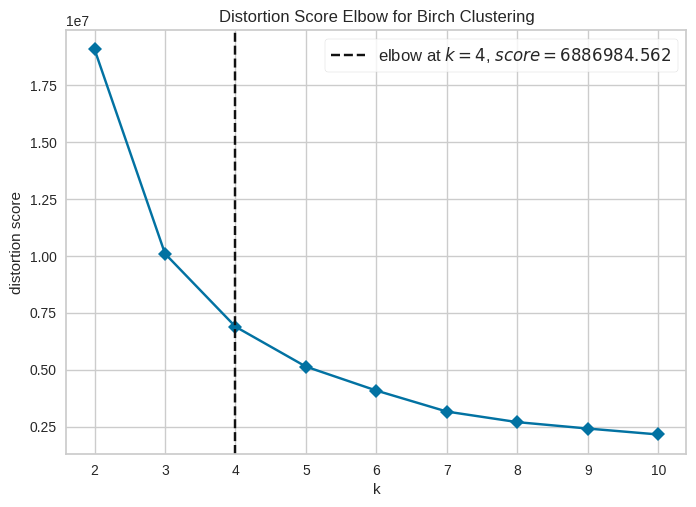

In [24]:
setup(data, verbose=False)
r101 = []
r102 = []
r103 = []
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r101.append(silhouette_score(data,labels))
r101.append(calinski_harabasz_score(data,labels))
r101.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r102.append(silhouette_score(data,labels))
r102.append(calinski_harabasz_score(data,labels))
r102.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r103.append(silhouette_score(data,labels))
r103.append(calinski_harabasz_score(data,labels))
r103.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2598,503.5507,1.3580,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1721,379.3424,1.9854,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1449,300.4316,2.3016,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

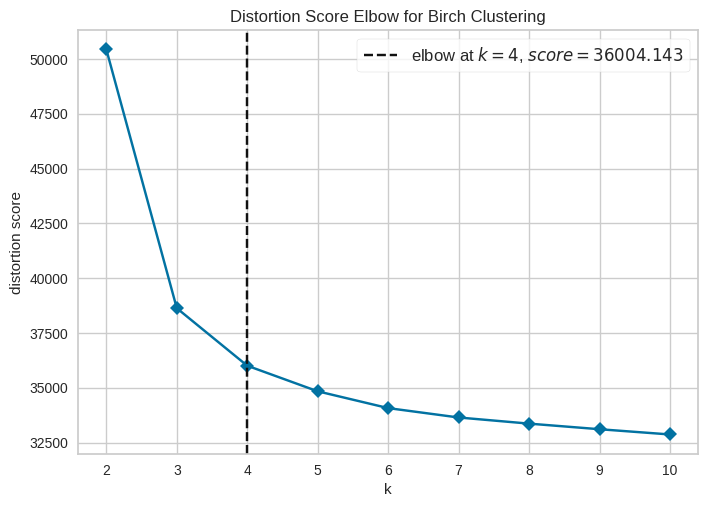

In [25]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r104 = []
r105 = []
r106 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r104.append(silhouette_score(data,labels))
r104.append(calinski_harabasz_score(data,labels))
r104.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r105.append(silhouette_score(data,labels))
r105.append(calinski_harabasz_score(data,labels))
r105.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r106.append(silhouette_score(data,labels))
r106.append(calinski_harabasz_score(data,labels))
r106.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5495,2554.8483,0.5791,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5022,2461.1352,0.6045,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4777,2587.6236,0.6813,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

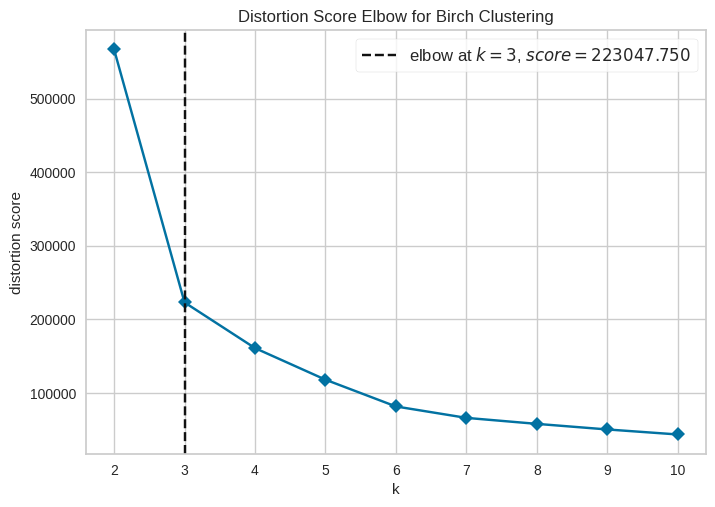

In [26]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r107 = []
r108 = []
r109 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r107.append(silhouette_score(data,labels))
r107.append(calinski_harabasz_score(data,labels))
r107.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r108.append(silhouette_score(data,labels))
r108.append(calinski_harabasz_score(data,labels))
r108.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r109.append(silhouette_score(data,labels))
r109.append(calinski_harabasz_score(data,labels))
r109.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4761,1627.2474,0.7245,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4805,1713.8040,0.6989,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4500,1791.3558,0.7422,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

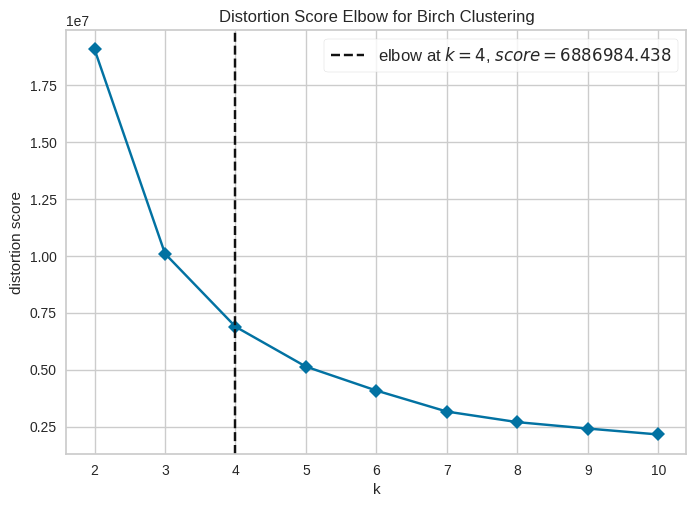

In [27]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r110 = []
r111 = []
r112 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r110.append(silhouette_score(data,labels))
r110.append(calinski_harabasz_score(data,labels))
r110.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r111.append(silhouette_score(data,labels))
r111.append(calinski_harabasz_score(data,labels))
r111.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r112.append(silhouette_score(data,labels))
r112.append(calinski_harabasz_score(data,labels))
r112.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2663,581.0961,1.4095,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2062,440.9599,1.6842,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1424,348.5415,2.2946,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

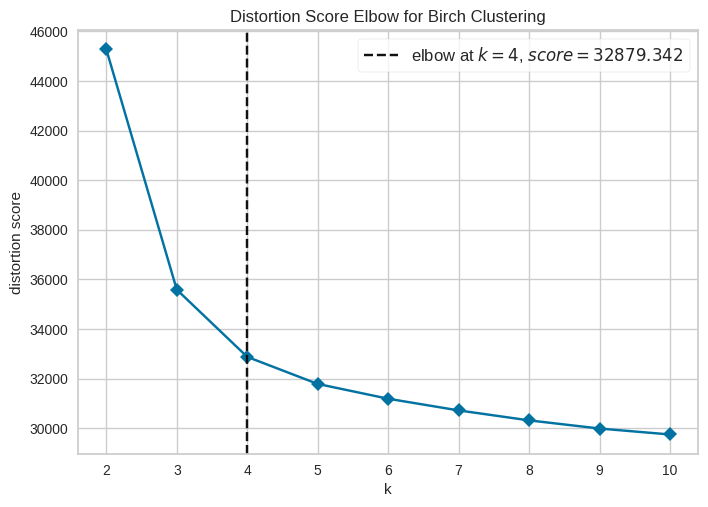

In [28]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r113 = []
r114 = []
r115 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r113.append(silhouette_score(data,labels))
r113.append(calinski_harabasz_score(data,labels))
r113.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r114.append(silhouette_score(data,labels))
r114.append(calinski_harabasz_score(data,labels))
r114.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r115.append(silhouette_score(data,labels))
r115.append(calinski_harabasz_score(data,labels))
r115.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2663,581.0959,1.4095,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2062,440.9600,1.6842,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1424,348.5414,2.2946,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

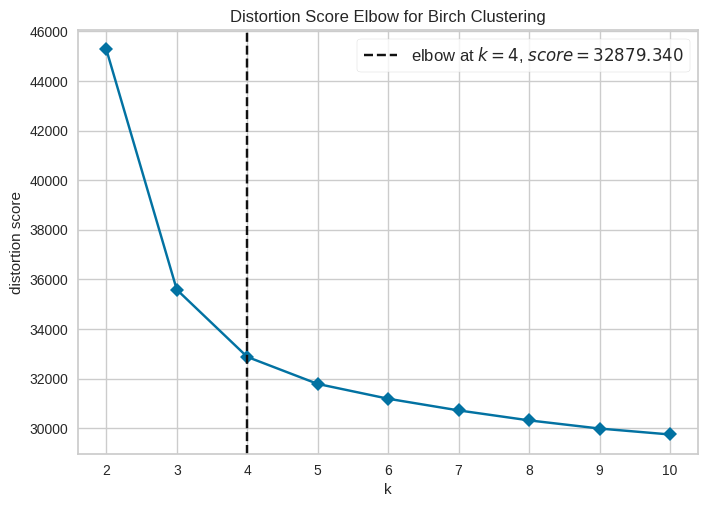

In [29]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      pca = True, pca_method = 'linear', verbose=False)

r116 = []
r117 = []
r118 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r116.append(silhouette_score(data,labels))
r116.append(calinski_harabasz_score(data,labels))
r116.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r117.append(silhouette_score(data,labels))
r117.append(calinski_harabasz_score(data,labels))
r117.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r118.append(silhouette_score(data,labels))
r118.append(calinski_harabasz_score(data,labels))
r118.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [32]:
result3 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r101,'No Data Processing(c=4)': r102,'No Data Processing(c=5)': r103,
           'Using Normalization(c=3)' : r104,'Using Normalization(c=4)' : r105,'Using Normalization(c=5)' : r106,
           'Using Transform(c=3)' : r107,'Using Transform(c=4)' : r108,'Using Transform(c=5)' : r109,
           'Using PCA(c=3)' : r110,'Using PCA(c=4)' : r111,'Using PCA(c=5)' : r112,
           'Using T + N(c=3)': r113,'Using T + N(c=4)': r114,'Using T + N(c=5)': r115,
           'T + N + PCA(c=3)': r116,'T + N + PCA(c=4)': r117,'T + N + PCA(c=5)': r118}

In [33]:
result3df = pd.DataFrame(result3)

# Results

In [40]:
print("Using K-Means Clustering")
result1df

Using K-Means Clustering


,Parameters,No Data Processing(c=3),No Data Processing(c=4),No Data Processing(c=5),Using Normalization(c=3),Using Normalization(c=4),Using Normalization(c=5),Using Transform(c=3),Using Transform(c=4),Using Transform(c=5),Using PCA(c=3),Using PCA(c=4),Using PCA(c=5),Using T + N(c=3),Using T + N(c=4),Using T + N(c=5),T + N + PCA(c=3),T + N + PCA(c=4),T + N + PCA(c=5)
0,Silhouette,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973
1,Calinski-Harabasz,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035
2,Davies-Bouldins,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183


In [36]:
print("Using Hierarchical Clustering")
result2df


Using Hierarchical Clustering


,Parameters,No Data Processing(c=3),No Data Processing(c=4),No Data Processing(c=5),Using Normalization(c=3),Using Normalization(c=4),Using Normalization(c=5),Using Transform(c=3),Using Transform(c=4),Using Transform(c=5),Using PCA(c=3),Using PCA(c=4),Using PCA(c=5),Using T + N(c=3),Using T + N(c=4),Using T + N(c=5),T + N + PCA(c=3),T + N + PCA(c=4),T + N + PCA(c=5)
0,Silhouette,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973
1,Calinski-Harabasz,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035
2,Davies-Bouldins,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183


In [38]:
print("Using Birch Clustering")
result3df

Using Birch Clustering


,Parameters,No Data Processing(c=3),No Data Processing(c=4),No Data Processing(c=5),Using Normalization(c=3),Using Normalization(c=4),Using Normalization(c=5),Using Transform(c=3),Using Transform(c=4),Using Transform(c=5),Using PCA(c=3),Using PCA(c=4),Using PCA(c=5),Using T + N(c=3),Using T + N(c=4),Using T + N(c=5),T + N + PCA(c=3),T + N + PCA(c=4),T + N + PCA(c=5)
0,Silhouette,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973,0.476088,0.480460,0.449973
1,Calinski-Harabasz,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035,1627.247445,1713.804286,1791.356035
2,Davies-Bouldins,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183,0.724512,0.698881,0.742183
